주성분 분석
- 차원 축소

학습 순서
- 자원 축소해서 그래프 그리기
- 속도와 예측력을 향상시키기
- PCA에 대한 이해

사용 분야
- 다차원 변수들을 2차원 그래프로 시각화
- 변수가 많아서 학습 시간이 오래 걸릴 때
- 오버 피팅을 방지하는 목적


클러스터링 모델의 예측에 사용한 독립 변수가 너무 많을 때

In [2]:
# 필요한 라이브러리
file_url = 'https://raw.githubusercontent.com/kyuyounglee/data/main/customer_pca.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customer = pd.read_csv(file_url)
customer.head(2)

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.07026,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.80735,0.659967,-0.222587,3


In [3]:
customer_X = customer.drop('label',axis=1)
customer_y = customer['label']

In [4]:
from sklearn.decomposition import PCA

In [5]:
# 주성분 갯수를 2개로 해서 시각화

In [6]:
pca = PCA(n_components=2)

In [7]:
customer_pca = pca.fit_transform(customer_X)

In [8]:
print(customer_pca.shape,customer_y.shape)

(100, 2) (100,)


In [9]:
customer_pca = np.hstack((customer_pca, customer_y.values.reshape(-1, 1)))
customer_pca[:5]

array([[-3.92906072,  0.10260449,  0.        ],
       [ 3.10758276, -1.7488793 ,  3.        ],
       [ 3.02379272,  3.21221215,  1.        ],
       [-4.28241767,  0.0113781 ,  0.        ],
       [ 2.59065802, -1.90612064,  3.        ]])

In [10]:
customer_pca = pd.DataFrame(customer_pca,columns=['pc1','pc2','label'] )
customer_pca.head()

,pc1,pc2,label
0,-3.929061,0.102604,0.0
1,3.107583,-1.748879,3.0
2,3.023793,3.212212,1.0
3,-4.282418,0.011378,0.0
4,2.590658,-1.906121,3.0


<Axes: xlabel='pc1', ylabel='pc2'>

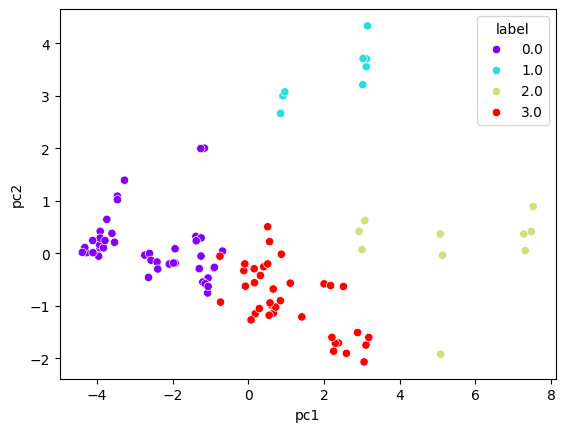

In [11]:
sns.scatterplot(customer_pca, x='pc1', y='pc2', hue='label', palette='rainbow')

In [12]:
pca.components_ # 주성분과 기존 변수와의 상관관계

array([[ 0.3484681 ,  0.32447242,  0.30303652,  0.14186907,  0.30618347,
         0.31297263,  0.29718852,  0.3045823 ,  0.29341337,  0.30287672,
         0.32053447,  0.08927503],
       [ 0.05827591,  0.06034266,  0.15264674, -0.54435586,  0.03109502,
         0.03790586,  0.23809571, -0.2315275 , -0.2471928 , -0.20898284,
         0.14479001,  0.65946781]])

In [13]:
df_comp = pd.DataFrame(pca.components_, columns=customer_X.columns)
df_comp.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,0.348468,0.324472,0.303037,0.141869,0.306183,0.312973,0.297189,0.304582,0.293413,0.302877,0.320534,0.089275
1,0.058276,0.060343,0.152647,-0.544356,0.031095,0.037906,0.238096,-0.231528,-0.247193,-0.208983,0.144790,0.659468


<Axes: >

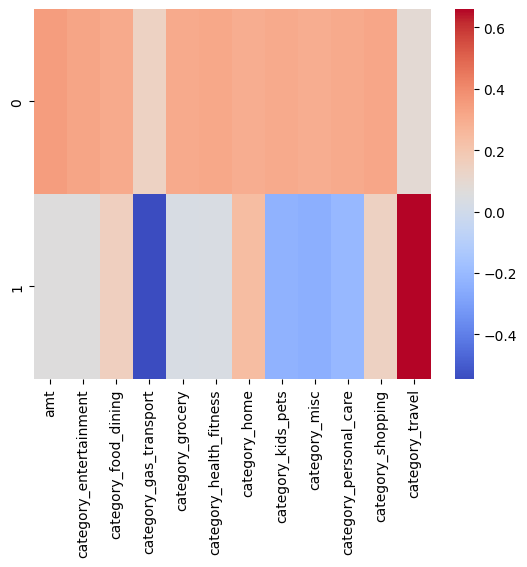

In [14]:
sns.heatmap(df_comp, cmap='coolwarm')

다차원 데이터

In [15]:
manycols_df = pd.read_csv('https://raw.githubusercontent.com/kyuyounglee/data/main/toomanycols.csv')
manycols_df = manycols_df.dropna()
manycols_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 209
Columns: 4297 entries, class to V4296
dtypes: float64(4277), int64(20)
memory usage: 6.9 MB


In [16]:
manycols_df.head()

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.25777,0.12220,0.348620,0.12957,0.43846,-0.108020,0.128330,0.318820,-0.041559,0.22589
1,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15316,0.14062,-0.030201,0.10134,-0.14546,-0.166650,0.401300,0.035392,0.019906,0.31952
2,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.40122,0.13790,0.138350,0.15746,0.51216,-0.330690,0.070346,0.179250,-0.188740,0.16386
3,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15587,-0.26686,0.158930,-0.13204,0.32221,-0.042086,0.588970,0.526990,-0.574320,0.20891
4,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,0.24020,0.44605,-0.163560,0.45311,0.59073,0.356800,0.395780,0.035871,-0.293430,0.38124


In [17]:
manycols_df['class'].unique()

array([1])

In [18]:
temp = manycols_df.isnull().sum()
temp[manycols_df.isnull().sum()>0]

Series([], dtype: int64)

In [19]:
# PCA를 이용해서 주성분 분석
X = manycols_df.drop(columns=['class'])
y = manycols_df['class']
pca = PCA(n_components = 2)
manycols_df_pca = pca.fit_transform(manycols_df)
manycols_df_pca[:5]

array([[-21.04055312, -23.11860569],
       [-21.04660328, -23.12860385],
       [-21.02606571, -23.13129486],
       [-21.05658084, -23.13351696],
       [-21.04428245, -23.14374758]])

In [20]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(manycols_df_pca)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier()
model_1.fit(X,y)

RandomForestClassifier()

In [23]:
model_1.fit(manycols_df.drop('class',axis=1), manycols_df['class'])

RandomForestClassifier()

In [24]:
# 주성분분석은
# 속도 상승 성능 향상 시각화
# 컬럼수가 많이 늘어나는 경우에 사용